In [2]:
# Import Libraries
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
from pprint import pprint

# Import The Movie Dataset CSVs into Dataframes
credits_df = pd.read_csv("Resources/credits.csv")
keywords_df = pd.read_csv("Resources/keywords.csv")
links_small_df = pd.read_csv("Resources/links_small.csv")
links_df = pd.read_csv("Resources/links.csv")
movies_df = pd.read_csv("Resources/movies_metadata.csv")
ratings_small_df = pd.read_csv("Resources/ratings_small.csv")
ratings_df = pd.read_csv("Resources/ratings.csv")

C:\Users\flash\AppData\Local\Temp\ipykernel_7892\1349938314.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("Resources/movies_metadata.csv")


In [ ]:
# Setting OMDB query param for looking up IMDb IDs
omdb_api_key = "XXXXXXXX"
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=" + omdb_api_key

<font size = '5'>Question 1: What are the most common movie genres released over the years?</font>


In [ ]:
#drop columns that are not needed

cleaned_movies_df= movies_df.drop(columns=["adult", "belongs_to_collection",
                "homepage","original_language",
                "overview","poster_path",
                "spoken_languages","title","tagline",
                "production_companies","production_countries",
                "video"])

#convert release date to datetime format
cleaned_movies_df["release_date"]=pd.to_datetime(cleaned_movies_df["release_date"], errors="coerce")
cleaned_movies_df["release_date"]=cleaned_movies_df["release_date"].dt.year

cleaned_movies_df=cleaned_movies_df.dropna() #drop rows with missing values
cleaned_movies_df=cleaned_movies_df.dropna(axis=1) #drop columns with missing values

#covert genres column from a list
cleaned_movies_df["genres"]=cleaned_movies_df["genres"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)
cleaned_movies_df.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995.0,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995.0,262797249.0,104.0,Released,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.7129,1995.0,0.0,101.0,Released,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,Released,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,Released,5.7,173.0


In [ ]:
# Convert Genres column from a dictionary to a list and fill NAN with empty List
cleaned_movies_df["genres"] = cleaned_movies_df["genres"].apply(
    lambda x: x if isinstance(x, list) else []
)

cleaned_movies_df["genres"]=cleaned_movies_df["genres"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

cleaned_movies_df.head()


,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,21.946943,1995.0,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,Jumanji,17.015539,1995.0,262797249.0,104.0,Released,6.9,2413.0
2,0,"[Romance, Comedy]",15602,tt0113228,Grumpier Old Men,11.7129,1995.0,0.0,101.0,Released,6.5,92.0
3,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,Released,6.1,34.0
4,0,[Comedy],11862,tt0113041,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,Released,5.7,173.0


In [ ]:
#filter movies released after 2009

last_decade_movies_df=cleaned_movies_df[(cleaned_movies_df["release_date"].notna()) & #removes NAN years/values
                                        (cleaned_movies_df["release_date"]>=2009) &
                                        (cleaned_movies_df["release_date"]<2020)] #filters movies released after 2010



# Flatten the 'genres' list and count occurrences
genre_counts = last_decade_movies_df['genres'].explode().value_counts()

# Create a DataFrame with the genre counts
genre_counts_df = pd.DataFrame(genre_counts).reset_index()
genre_counts_df.columns = ['genre', 'count']
genre_counts_df.head(20)


,genre,count
0,Drama,5854
1,Comedy,3970
2,Thriller,2703
3,Documentary,2087
4,Action,1856
5,Romance,1654
6,Horror,1554
7,Crime,1052
8,Science Fiction,920
9,Adventure,905


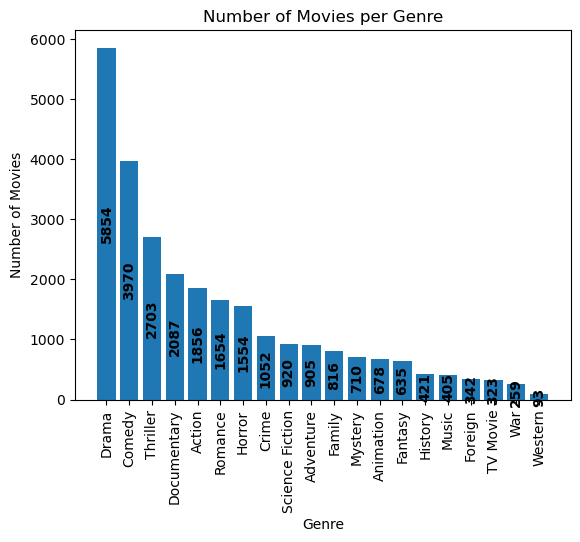

In [ ]:
#number of movies per genre released over the years

plt.bar(genre_counts_df["genre"], genre_counts_df["count"])
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")

# Add the exact y-axis number on each bar
for i, c in enumerate(genre_counts_df['count']):
    plt.text(i, c / 2, str(c), ha='center', va='center', color='black', fontweight='bold', rotation=90)

plt.xticks(rotation=90)
plt.show()


In [ ]:
final_movies=cleaned_movies_df[['id','original_title','vote_average', 'runtime']]
final_movies.head(20)


,id,original_title,vote_average,runtime
0,862,Toy Story,7.7,81.0
1,8844,Jumanji,6.9,104.0
2,15602,Grumpier Old Men,6.5,101.0
3,31357,Waiting to Exhale,6.1,127.0
4,11862,Father of the Bride Part II,5.7,106.0
5,949,Heat,7.7,170.0
6,11860,Sabrina,6.2,127.0
7,45325,Tom and Huck,5.4,97.0
8,9091,Sudden Death,5.5,106.0
9,710,GoldenEye,6.6,130.0


In [ ]:
#create a dataframe of the top 10 genres per year released

#explode the genres column which is in a list format to a row format
genre_explode=last_decade_movies_df.explode("genres")

#grouping by release date and genre to get the count of each genre per year
genre_explode=genre_explode.groupby(["release_date","genres"]).size().reset_index(name="count")

genre_explode=genre_explode.sort_values(by=["release_date","count"], ascending=[True,False])

#group by release date and get the top 10 genres per year
genre_explode=genre_explode.groupby("release_date").head(10)

#reset index
genre_explode=genre_explode.reset_index(drop=True)
genre_explode.head(20)


,release_date,genres,count
0,2009.0,Drama,694
1,2009.0,Comedy,468
2,2009.0,Thriller,345
3,2009.0,Action,242
4,2009.0,Documentary,218
5,2009.0,Romance,213
6,2009.0,Horror,184
7,2009.0,Adventure,127
8,2009.0,Crime,126
9,2009.0,Science Fiction,124


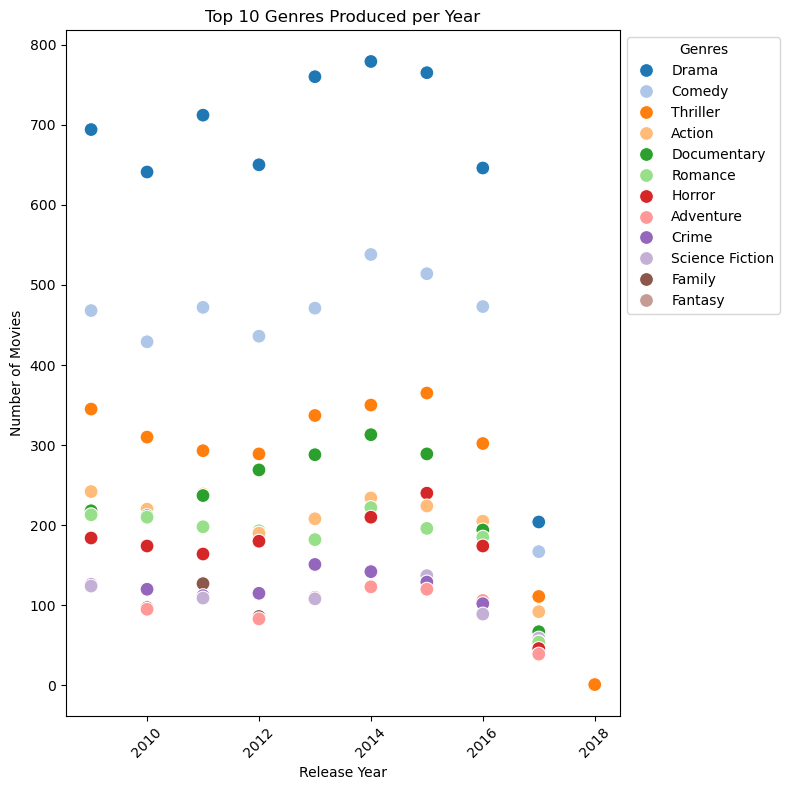

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create a scatter plot with Seaborn
sns.scatterplot(data=genre_explode, x="release_date", y="count", hue="genres", palette="tab20", s=100)

# Adding labels and title
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Top 10 Genres Produced per Year")
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Genres", bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [ ]:
# For each 'release_date', get the first (i.e., the genre with the lowest count)
lowest_genre_per_year = genre_explode.groupby("release_date").tail(1).reset_index(drop=True)

# Display the DataFrame
lowest_genre_per_year.head(10)


,release_date,genres,count
0,2009.0,Science Fiction,124
1,2010.0,Adventure,95
2,2011.0,Science Fiction,109
3,2012.0,Adventure,83
4,2013.0,Science Fiction,108
5,2014.0,Adventure,123
6,2015.0,Adventure,120
7,2016.0,Science Fiction,89
8,2017.0,Adventure,39
9,2018.0,Thriller,1


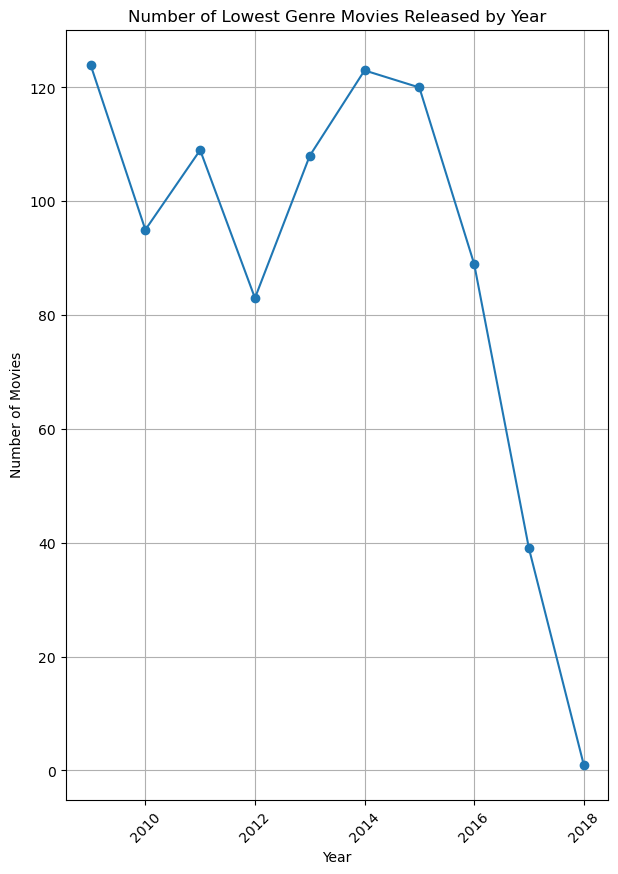

In [ ]:
plt.figure(figsize=(7, 10))
plt.plot(lowest_genre_per_year["release_date"], lowest_genre_per_year["count"], marker='o')
plt.title("Number of Lowest Genre Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid()
plt.show()





<font size = '5'>Question 2: Which directors have the highest average IMDb ratings across their films?</font>


In [ ]:
#Question_2_your_name - Which directors have the highest average IMDb ratings across their films?
#get the credits csv file
#Dropping Cast Column
clean_credits_df = credits_df.drop(columns = ["cast"])

#convert crew  from a list to rows
clean_credits_df["crew"]=clean_credits_df["crew"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)

# Fill NaN with empty lists
clean_credits_df["crew"] = clean_credits_df["crew"].apply(lambda x: x if isinstance(x, list) else [])


clean_credits_df.head()


,crew,id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
#extract the director from the crew column
def get_director(x):
    if isinstance(x,list):
        for i in x:
            if isinstance(i, dict)and i.get("job")=="Director":
                return i.get("name", "")
    return ""

#add director column to our original df
clean_credits_df["Director"]=clean_credits_df["crew"].apply(get_director)

# Check the results on a new dataframe to merge later
final_credits=clean_credits_df[["Director", "id"]]
final_credits.head()


,Director,id
0,John Lasseter,862
1,Joe Johnston,8844
2,Howard Deutch,15602
3,Forest Whitaker,31357
4,Charles Shyer,11862


In [ ]:
#get data from our ratings.csv file
#rename movieId to id to merge dataframes

cleaned_rating_df = ratings_df.drop(columns=["userId", "timestamp"])
cleaned_rating_df.rename(columns={'movieId':"id"}, inplace=True)

cleaned_rating_df.head(10)


,id,rating
0,110,1.0
1,147,4.5
2,858,5.0
3,1221,5.0
4,1246,5.0
5,1968,4.0
6,2762,4.5
7,2918,5.0
8,2959,4.0
9,4226,4.0


In [ ]:

final_movies=final_movies.copy()
final_movies['id'] = final_movies['id'].astype(int)

#merging director to movie ratings on id
merged_df=pd.merge(final_credits, cleaned_rating_df, on="id")
f_merged_df=pd.merge(merged_df, final_movies, on='id')
#f_merged_df

first_rating_df = f_merged_df.drop_duplicates(subset=['Director', 'id'], keep='first')
#first_rating_df_sorted = first_rating_df.sort_values(by='rating', ascending=False)

# Display the result
first_rating_df.head(15)


,Director,id,rating,original_title,vote_average,runtime
0,John Lasseter,862,3.0,Toy Story,7.7,81.0
374,Joe Johnston,8844,4.0,Jumanji,6.9,104.0
497,Michael Mann,949,4.0,Heat,7.7,170.0
2842,Martin Campbell,710,3.0,GoldenEye,6.6,130.0
4161,Renny Harlin,1408,5.0,Cutthroat Island,5.7,119.0
18049,Martin Scorsese,524,2.0,Casino,7.8,178.0
27212,Ang Lee,4584,4.0,Sense and Sensibility,7.2,136.0
27489,Allison Anders,5,3.0,Four Rooms,6.5,98.0
42747,Barry Sonnenfeld,8012,4.0,Get Shorty,6.4,105.0
43370,Jon Amiel,1710,3.0,Copycat,6.5,124.0


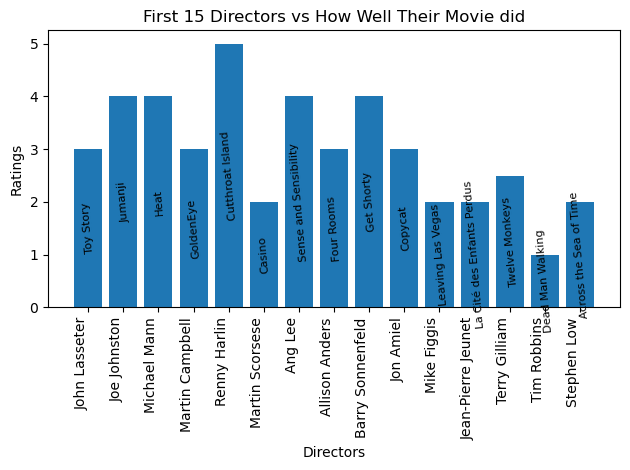

In [ ]:
first_15_directors=first_rating_df.head(15)


plt.bar(first_15_directors["Director"], first_15_directors["rating"])
#plt.figure(figsize=(20, 8))
plt.xlabel("Directors")
plt.ylabel("Ratings")
plt.title("First 15 Directors vs How Well Their Movie did")


# Add the exact movie name on each bar

for i, (rating, title) in enumerate(zip(first_15_directors['rating'], first_15_directors['original_title'])):
    plt.text(i, rating / 2, str(title), ha='center', va='center',\
            color='black',fontsize=8, rotation=95)

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Final read data into CSV format
first_rating_df.to_csv('first_rating_directors.csv', index=False)


In [ ]:
api_key= "&apikey=" + "XXXXXXX"
url="https://www.omdbapi.com/?t="

response=requests.get(url + first_rating_df.iloc[4,3] + api_key)
data=response.json()
pprint(data)



{'Actors': 'Geena Davis, Matthew Modine, Frank Langella',
 'Awards': '1 nomination total',
 'BoxOffice': '$10,017,322',
 'Country': 'France, Italy, Germany, United States',
 'DVD': 'N/A',
 'Director': 'Renny Harlin',
 'Genre': 'Action, Adventure, Comedy',
 'Language': 'English, Spanish, Latin, French',
 'Metascore': '37',
 'Plot': 'A female pirate and her companion race against their rivals to find '
         'a hidden island that contains a fabulous treasure.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BZTQ3OWY2NTctOTAyNS00MThjLTgyZjEtNzgzZGNiZDNhODUyXkEyXkFqcGc@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.7/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '40%'},
             {'Source': 'Metacritic', 'Value': '37/100'}],
 'Released': '22 Dec 1995',
 'Response': 'True',
 'Runtime': '124 min',
 'Title': 'Cutthroat Island',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Michael Frost Beckner,

In [ ]:
print(f'The Movie {data['Title']}, was released in {data["Released"]}, got {data['Awards']}  and had a Box Office total of: {data['BoxOffice']}')

The Movie Cutthroat Island, was released in 22 Dec 1995, got 1 nomination total  and had a Box Office total of: $10,017,322


<font size='5'>Question 3: What is the trend of movie runtimes over the years?</font>

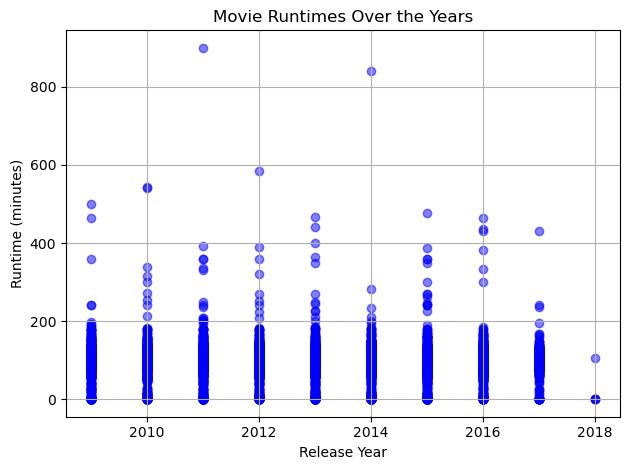

In [ ]:

#Question_3_your_name - What is the trend of movie runtimes over the years (e.g., are movies getting longer or shorter)?
trend_movies_df=last_decade_movies_df[["release_date","runtime"]]
trend_movies_df

# Set the figure size
#plt.figure(figsize=(12, 8))
plt.scatter(trend_movies_df["release_date"], trend_movies_df["runtime"], color="blue", alpha=0.5)
plt.title("Movie Runtimes Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Runtime (minutes)")
plt.tight_layout()

plt.grid()
plt.show()

<font size = '5'>Question 4 - Which Actors appear most frequently in high-rated movies (e.g., IMDb ratings > 7)</font>

In [ ]:
# Dropping unneeded columns for movie dataframe
clean_movies_df = movies_df.drop(columns=["adult", 
                                          "belongs_to_collection", 
                                          "budget", 
                                          "genres", 
                                          "homepage", 
                                          "original_language", 
                                          "overview",
                                          "popularity",
                                          "poster_path",
                                          "production_companies",
                                          "production_countries",
                                          "revenue", 
                                          "runtime", 
                                          "spoken_languages", 
                                          "status", 
                                          "tagline", 
                                          "video"])

# Dropping Cast Column
clean_credits_df = credits_df.drop(columns = ["crew"])


In [ ]:
pd.options.display.max_colwidth = 500 
clean_credits_df.head()

,cast,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f8...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2, 'id': 6837, 'name': 'Walter Matthau', 'order': 0, 'profile_path': '/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg'}, {'cast_id': 3, 'character': 'John Gustafson', 'credit_id': '52fe466a9251416c75077a91', 'gender': 2, 'id': 3151, 'name': 'Jack Lemmon', 'order': 1, 'profile_path': '/chZmNRYMtqkiDlatprGDH4BzGqG.jpg'}, {'cast_id': 4, 'character': 'Ariel Gustafson', 'credit_id': '52fe466a9251416c75077a95', 'gender...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad', 'gender': 1, 'id': 8851, 'name': 'Whitney Houston', 'order': 0, 'profile_path': '/69ouDnXnmklYPr4sMJXWKYz81AL.jpg'}, {'cast_id': 2, 'character': ""Bernadine 'Bernie' Harris"", 'credit_id': '52fe44779251416c91011ab1', 'gender': 1, 'id': 9780, 'name': 'Angela Bassett', 'order': 1, 'profile_path': '/tHkgSzhEuJKp5hqp0DZLad8HNZ9.jpg'}, {'cast_id': 3, 'character': ""Gloria 'Glo' Matthews"", 'credit_id': ...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': 2, 'id': 67773, 'name': 'Steve Martin', 'order': 0, 'profile_path': '/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg'}, {'cast_id': 2, 'character': 'Nina Banks', 'credit_id': '52fe44959251416c75039ebd', 'gender': 1, 'id': 3092, 'name': 'Diane Keaton', 'order': 1, 'profile_path': '/fzgUMnbOkxC6E3EFcYHWHFaiKyp.jpg'}, {'cast_id': 3, 'character': 'Franck Eggelhoffer', 'credit_id': '52fe44959251416c75039ec1', 'gender...",11862


In [ ]:
# Converting 'cast' column from strings to Python objects
clean_credits_df['cast'] = clean_credits_df['cast'].apply(ast.literal_eval)

In [ ]:
# Extract actor names
actor_names_df = clean_credits_df['cast'].apply(lambda x: [person['name'] for person in x])

# Setting the max number of actors per movie to 5
max_actors = 5

# Filling in list with "None" to make sure all rows have the same number of actors
actor_names_df = actor_names_df.apply(lambda x: x[:max_actors] + [None] * (max_actors - len(x)))

# Inserting actors in their own column
actor_columns = pd.DataFrame(actor_names_df.tolist(), 
                             columns=[f'actor_{i+1}' for i in range(max_actors)])

# Aligning indexes
actor_columns.index = clean_credits_df.index

# Merging the new actor columns with the original DataFrame
actor_results_df = pd.concat([clean_credits_df, actor_columns], axis=1)

# Removing old cast column
actor_results_df = actor_results_df.drop(columns=['cast'])

# Print the result
actor_results_df.head()


,id,actor_1,actor_2,actor_3,actor_4,actor_5
0,862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn
1,8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt
2,15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah
3,31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines
4,11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern


In [ ]:
# Cleaning up invalid entries
clean_movies_df['id'] = pd.to_numeric(clean_movies_df['id'], errors='coerce')
actor_results_df['id'] = pd.to_numeric(actor_results_df['id'], errors='coerce')
clean_movies_df = clean_movies_df.dropna(subset=['id'])
actor_results_df = actor_results_df.dropna(subset=['id'])

# Setting id column to int
clean_movies_df['id'] = clean_movies_df['id'].astype(int)
actor_results_df['id'] = actor_results_df['id'].astype(int)

# Merge
merged_movie_df = pd.merge(clean_movies_df, actor_results_df, how='left', on='id')
merged_movie_df.head()

,id,imdb_id,original_title,release_date,title,vote_average,vote_count,actor_1,actor_2,actor_3,actor_4,actor_5
0,862,tt0114709,Toy Story,1995-10-30,Toy Story,7.7,5415.0,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn
1,8844,tt0113497,Jumanji,1995-12-15,Jumanji,6.9,2413.0,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt
2,15602,tt0113228,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,92.0,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah
3,31357,tt0114885,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,34.0,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines
4,11862,tt0113041,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,5.7,173.0,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern


In [ ]:
# Putting the 5 actors into their own column with a repeating ID
merged_movie_df = merged_movie_df.melt(
    id_vars=['id', 'imdb_id', 'original_title', 'release_date', 'title', 'vote_average', 'vote_count'], 
    value_vars=['actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5'],  
    value_name='actor'  
)

# Applying Vote Average Filter
filtered_merged_movie_df = merged_movie_df[merged_movie_df['vote_average'] > 7]
actor_appearance_counts = filtered_merged_movie_df['actor'].value_counts()

# Display the top 20 actors 
actor_appearance_counts_df = actor_appearance_counts.reset_index()
actor_appearance_counts_df.columns = ['actor', 'appearance_count']
actor_appearance_counts_df.rename(columns={'actor': 'Actor', 'appearance_count': '# of Appearances'}, inplace=True)
actor_appearance_counts_df.head(20)

,Actor,# of Appearances
0,Robert De Niro,26
1,Bette Davis,26
2,Toshirō Mifune,23
3,Tom Hanks,21
4,Christopher Plummer,20
5,James Stewart,20
6,Werner Herzog,20
7,Humphrey Bogart,19
8,Clint Eastwood,19
9,Catherine Deneuve,19


In [ ]:
# Double checking our results
filtered_actor = merged_movie_df[
    (merged_movie_df['actor'] == 'Robert De Niro') & (merged_movie_df['vote_average'] > 7)
     ]
filtered_actor.sort_values(by='vote_average', ascending=False)

,id,imdb_id,original_title,release_date,title,vote_average,vote_count,variable,actor
20567,103162,tt0175844,Lenny Bruce: Swear to Tell the Truth,1998-10-21,Lenny Bruce: Swear to Tell the Truth,9.5,1.0,actor_1,Robert De Niro
137798,240,tt0071562,The Godfather: Part II,1974-12-20,The Godfather: Part II,8.3,3418.0,actor_4,Robert De Niro
1187,311,tt0087843,Once Upon a Time in America,1984-02-16,Once Upon a Time in America,8.3,1104.0,actor_1,Robert De Niro
1173,769,tt0099685,GoodFellas,1990-09-12,GoodFellas,8.2,3211.0,actor_1,Robert De Niro
109,103,tt0075314,Taxi Driver,1976-02-07,Taxi Driver,8.1,2632.0,actor_1,Robert De Niro
1221,11778,tt0077416,The Deer Hunter,1978-12-08,The Deer Hunter,7.8,943.0,actor_1,Robert De Niro
15,524,tt0112641,Casino,1995-11-22,Casino,7.8,1343.0,actor_1,Robert De Niro
1188,1578,tt0081398,Raging Bull,1980-11-14,Raging Bull,7.7,968.0,actor_1,Robert De Niro
45544,949,tt0113277,Heat,1995-12-15,Heat,7.7,1886.0,actor_2,Robert De Niro
46699,68,tt0088846,Brazil,1985-02-20,Brazil,7.6,877.0,actor_2,Robert De Niro


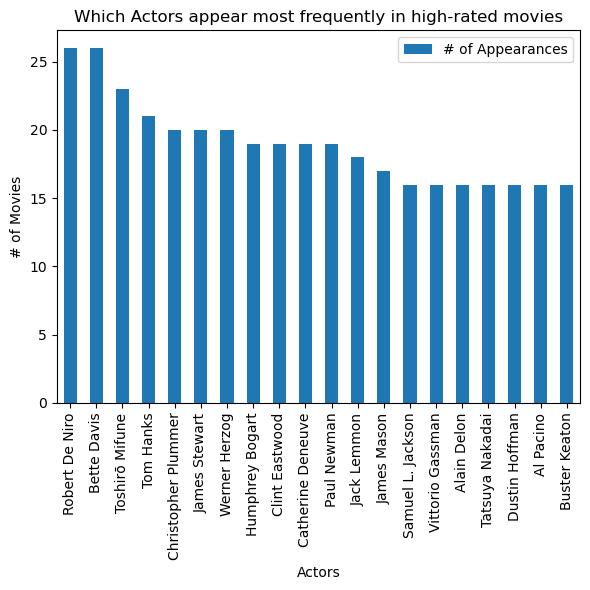

In [ ]:
# Visualization of Most appearances in movies with a score of 7+ IMDB
actor_appearance_counts_df.head(20).plot.bar(x='Actor', y='# of Appearances', figsize=(6,6), width=0.5)
plt.title('Which Actors appear most frequently in high-rated movies')
plt.xlabel('Actors')
plt.ylabel('# of Movies')
plt.tight_layout()
plt.show()

In [ ]:
# Implementing IMDb ID from Dataframe into OMDb API call for Paranormal Activity
imdb_id = filtered_actor.loc[filtered_actor['title'] == 'The Godfather: Part II', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [ ]:
# Print information about a movie from Robert De Niro

movie_actors = data['Actors'].split(", ")
target_movie_actor = movie_actors[1]
movie_title = data['Title']
movie_actor = data['Actors'][1]
movie_boxoffice = data['BoxOffice']
imdb_rating = filtered_actor.loc[filtered_actor['title'] == 'The Godfather: Part II', 'vote_average'].values[0]
release_date = data['Released']

print(f'{target_movie_actor} starred in the movie, {movie_title}. It was released in {release_date} and it grossed a box office of {movie_boxoffice} with an IMDb rating of {imdb_rating}.')


Robert De Niro starred in the movie, The Godfather Part II. It was released in 18 Dec 1974 and it grossed a box office of $47,834,595 with an IMDb rating of 8.3.


<font size = '5'>Question 5 - How does budget correlate with IMDb rating? Does more budget mean a better rating?</font>


In [ ]:
# Dropping unneeded columns for movie dataframe
q5_clean_movies_df = movies_df.drop(columns = ["adult", 
                                          "belongs_to_collection", 
                                          "genres", 
                                          "homepage", 
                                          "original_language",
                                          "original_title", 
                                          "overview",
                                          "popularity",
                                          "poster_path",
                                          "production_companies",
                                          "production_countries",
                                          "release_date",
                                          "revenue", 
                                          "runtime", 
                                          "spoken_languages", 
                                          "status", 
                                          "tagline", 
                                          "video"])



In [ ]:
# Filtering with movies with 1000+ votes
q5_filtered_movies_df = q5_clean_movies_df.loc[q5_clean_movies_df['vote_count'] > 1000]

# Changing Data type and formatting for budget
change_types = {'budget': int}
q5_filtered_movies_df = q5_filtered_movies_df.astype(change_types)
q5_filtered_movies_df['budget'] = pd.to_numeric(q5_filtered_movies_df['budget'], errors='coerce')
q5_filtered_movies_df

,budget,id,imdb_id,title,vote_average,vote_count
0,30000000,862,tt0114709,Toy Story,7.7,5415.0
1,65000000,8844,tt0113497,Jumanji,6.9,2413.0
5,60000000,949,tt0113277,Heat,7.7,1886.0
9,58000000,710,tt0113189,GoldenEye,6.6,1194.0
15,52000000,524,tt0112641,Casino,7.8,1343.0
...,...,...,...,...,...,...
43644,34000000,339403,tt3890160,Baby Driver,7.2,2083.0
44009,80000000,324852,tt3469046,Despicable Me 3,6.2,2002.0
44274,152000000,281338,tt3450958,War for the Planet of the Apes,6.7,1675.0
44678,100000000,374720,tt5013056,Dunkirk,7.5,2712.0


In [ ]:
# Sorting budget column
q5_filtered_movies_df = q5_filtered_movies_df.sort_values(by='budget', ascending=False)

# Taking the top 100 movies with the most budget
q5_movies_top100_df = q5_filtered_movies_df.head(100)
pd.set_option('display.max_rows', 100)

In [ ]:
# Sorting budget column
q5_filtered_movies_df = q5_filtered_movies_df.sort_values(by='budget', ascending=True)

# Filtering with movies with 0 budget
q5_filtered_movies_df = q5_filtered_movies_df.loc[q5_filtered_movies_df['budget'] > 0]

# Taking the top 100 movies with the most budget
q5_movies_bottom100_df = q5_filtered_movies_df.head(100)
pd.set_option('display.max_rows', 100)


In [ ]:
# Counting number of 7+, 6.99 - 5, and 4.99 - 0 for Top 100 movies with most budget

# 7+
topscores_7plus_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] >= 7)]
topscores_7plus_count = len(topscores_7plus_df)
print(topscores_7plus_count)



34


In [ ]:
# 6.99 - 5
topscores_6thru5_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] >= 5) & (q5_movies_top100_df['vote_average'] <= 6.99)]
topscores_6thru5_count = len(topscores_6thru5_df)
print(topscores_6thru5_count)


65


In [ ]:
# 4.99 - 0
topscores_4andless_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] <= 4.99)]
topscores_4andless_count = len(topscores_4andless_df)
print(topscores_4andless_count)

1


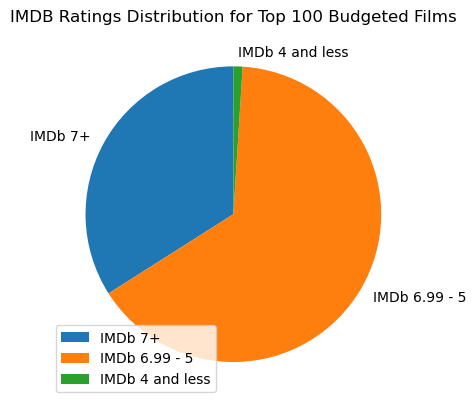

In [ ]:
# Pie Chart to showcase how movies appear based on rating

y = np.array([topscores_7plus_count, topscores_6thru5_count, topscores_4andless_count])
labels = ['IMDb 7+', 'IMDb 6.99 - 5', 'IMDb 4 and less']

plt.pie(y, labels=labels, startangle=90)
plt.title('IMDB Ratings Distribution for Top 100 Budgeted Films')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Implementing IMDb ID from Dataframe into OMDb API call
imdb_id = topscores_4andless_df.loc[topscores_4andless_df['title'] == 'Independence Day: Resurgence', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'Actors': 'Liam Hemsworth, Jeff Goldblum, Bill Pullman',
 'Awards': '3 wins & 17 nominations total',
 'BoxOffice': '$103,144,286',
 'Country': 'United States, India',
 'DVD': 'N/A',
 'Director': 'Roland Emmerich',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Language': 'English, Mandarin, Russian',
 'Metascore': '32',
 'Plot': 'Two decades after the first Independence Day invasion, Earth is '
         "faced with a new extra-Solar threat. But will mankind's new space "
         'defenses be enough?',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjIyMTg5MTg4OV5BMl5BanBnXkFtZTgwMzkzMjY5NzE@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.2/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '29%'},
             {'Source': 'Metacritic', 'Value': '32/100'}],
 'Released': '24 Jun 2016',
 'Response': 'True',
 'Runtime': '120 min',
 'Title': 'Independence Day: Resurgence',
 'Type': 'movie',
 'Website': 'N/A',
 '

In [ ]:
# Print information about worst rated movie with the most budget

movie_title = data['Title']
movie_budget = topscores_4andless_df['budget'].iloc[0]
movie_boxoffice = data['BoxOffice']
imdb_rating = topscores_4andless_df['vote_average'].iloc[0]
movie_plot = data['Plot']

print(f'The movie {movie_title} had a budget of ${movie_budget:,}. Their Box Office was {movie_boxoffice} with an IMDb rating of {imdb_rating}.')
print('')
print(f'Plot: {movie_plot}')

The movie Independence Day: Resurgence had a budget of $165,000,000. Their Box Office was $103,144,286 with an IMDb rating of 4.9.

Plot: Two decades after the first Independence Day invasion, Earth is faced with a new extra-Solar threat. But will mankind's new space defenses be enough?


In [ ]:
# Counting number of 7+, 6.99 - 5, and 4.99 - 0 for Top 100 movies with the least budget

# 7+
bottomscores_7plus_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] >= 7)]
bottomscores_7plus_count = len(bottomscores_7plus_df)
print(bottomscores_7plus_count )

67


In [ ]:
# 6.99 - 5
bottomscores_6thru5_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] >= 5) & (q5_movies_bottom100_df['vote_average'] <= 6.99)]
bottomscores_6thru5_count = len(bottomscores_6thru5_df)
print(bottomscores_6thru5_count)

31


In [ ]:
# 4.99 - 0
bottomscores_4andless_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] <= 4.99)]
bottomscores_4andless_count = len(bottomscores_4andless_df)
print(bottomscores_4andless_count)

2


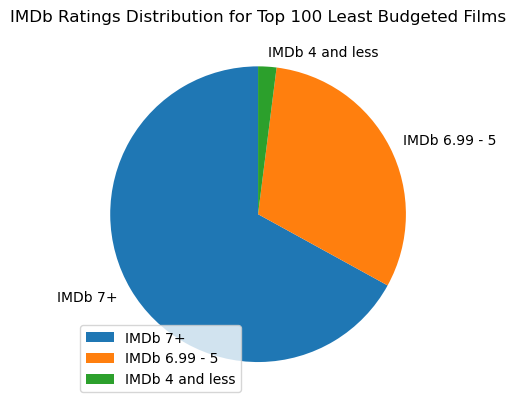

In [ ]:
# Pie Chart to showcase how movies appear based on rating (Least Budget)

y = np.array([bottomscores_7plus_count, bottomscores_6thru5_count, bottomscores_4andless_count])
labels = ['IMDb 7+', 'IMDb 6.99 - 5', 'IMDb 4 and less']

plt.pie(y, labels=labels, startangle=90)
plt.title('IMDb Ratings Distribution for Top 100 Least Budgeted Films')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# bottomscores_7plus_df = bottomscores_7plus_df.sort_values(by='vote_average', ascending=False)
bottomscores_7plus_df = bottomscores_7plus_df.sort_values(by='budget', ascending=True)
bottomscores_7plus_df.head(5)

,budget,id,imdb_id,title,vote_average,vote_count
1873,300000,948,tt0077651,Halloween,7.4,1066.0
1161,350000,389,tt0050083,12 Angry Men,8.2,2130.0
1100,400000,762,tt0071853,Monty Python and the Holy Grail,7.8,1742.0
1176,806948,539,tt0054215,Psycho,8.3,2405.0
896,839727,15,tt0033467,Citizen Kane,8.0,1244.0


In [ ]:
# Implementing IMDb ID from Dataframe into OMDb API call for Paranormal Activity
imdb_id = bottomscores_6thru5_df.loc[bottomscores_6thru5_df['title'] == 'Paranormal Activity', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [ ]:
# Print information about a movie with the least budget

movie_title = data['Title']
movie_budget = bottomscores_6thru5_df['budget'].iloc[0]
movie_boxoffice = data['BoxOffice']
imdb_rating = bottomscores_6thru5_df['vote_average'].iloc[0]
movie_plot = data['Plot']

print(f'The movie {movie_title} had a budget of ${movie_budget:,}. Their Box Office was {movie_boxoffice} with an IMDb rating of {imdb_rating}.')
print('')
print(f'Plot: {movie_plot}')

The movie Paranormal Activity had a budget of $15,000. Their Box Office was $107,918,810 with an IMDb rating of 5.9.

Plot: After moving into a suburban home, a couple becomes increasingly disturbed by a nightly demonic presence.
